In [1]:
import time, sys, os
import h5py
import numpy as np
import scipy
import matplotlib.pyplot as plt
import fsps
import sedpy
import prospect
from prospect.utils.obsutils import fix_obs
from glob import glob
from astropy.wcs import WCS
from astropy.io import fits
from prospect.models.templates import TemplateLibrary
from prospect.models import priors
from prospect.models import SpecModel
from multiprocessing import Pool

In [2]:
from prospect.io import read_results as reader
hfile = "./quickstart_emcee_mcmc5.h5"
out, out_obs, out_model = reader.results_from(hfile)

In [4]:
results_type = "emcee"
result, obs, _ = reader.results_from("./quickstart_emcee_mcmc5.h5".format(results_type), dangerous=False)

[ 2.70647674e+10 -6.14187962e-01  2.60636157e-01  1.37990195e+01
  2.08384019e+00]
Optimization value: [ 2.70647674e+10 -6.14187962e-01  2.60636157e-01  1.37990195e+01
  2.08384019e+00]
MAP value: [ 2.70647674e+10 -6.14187962e-01  2.60636157e-01  1.37990195e+01
  2.08384019e+00]


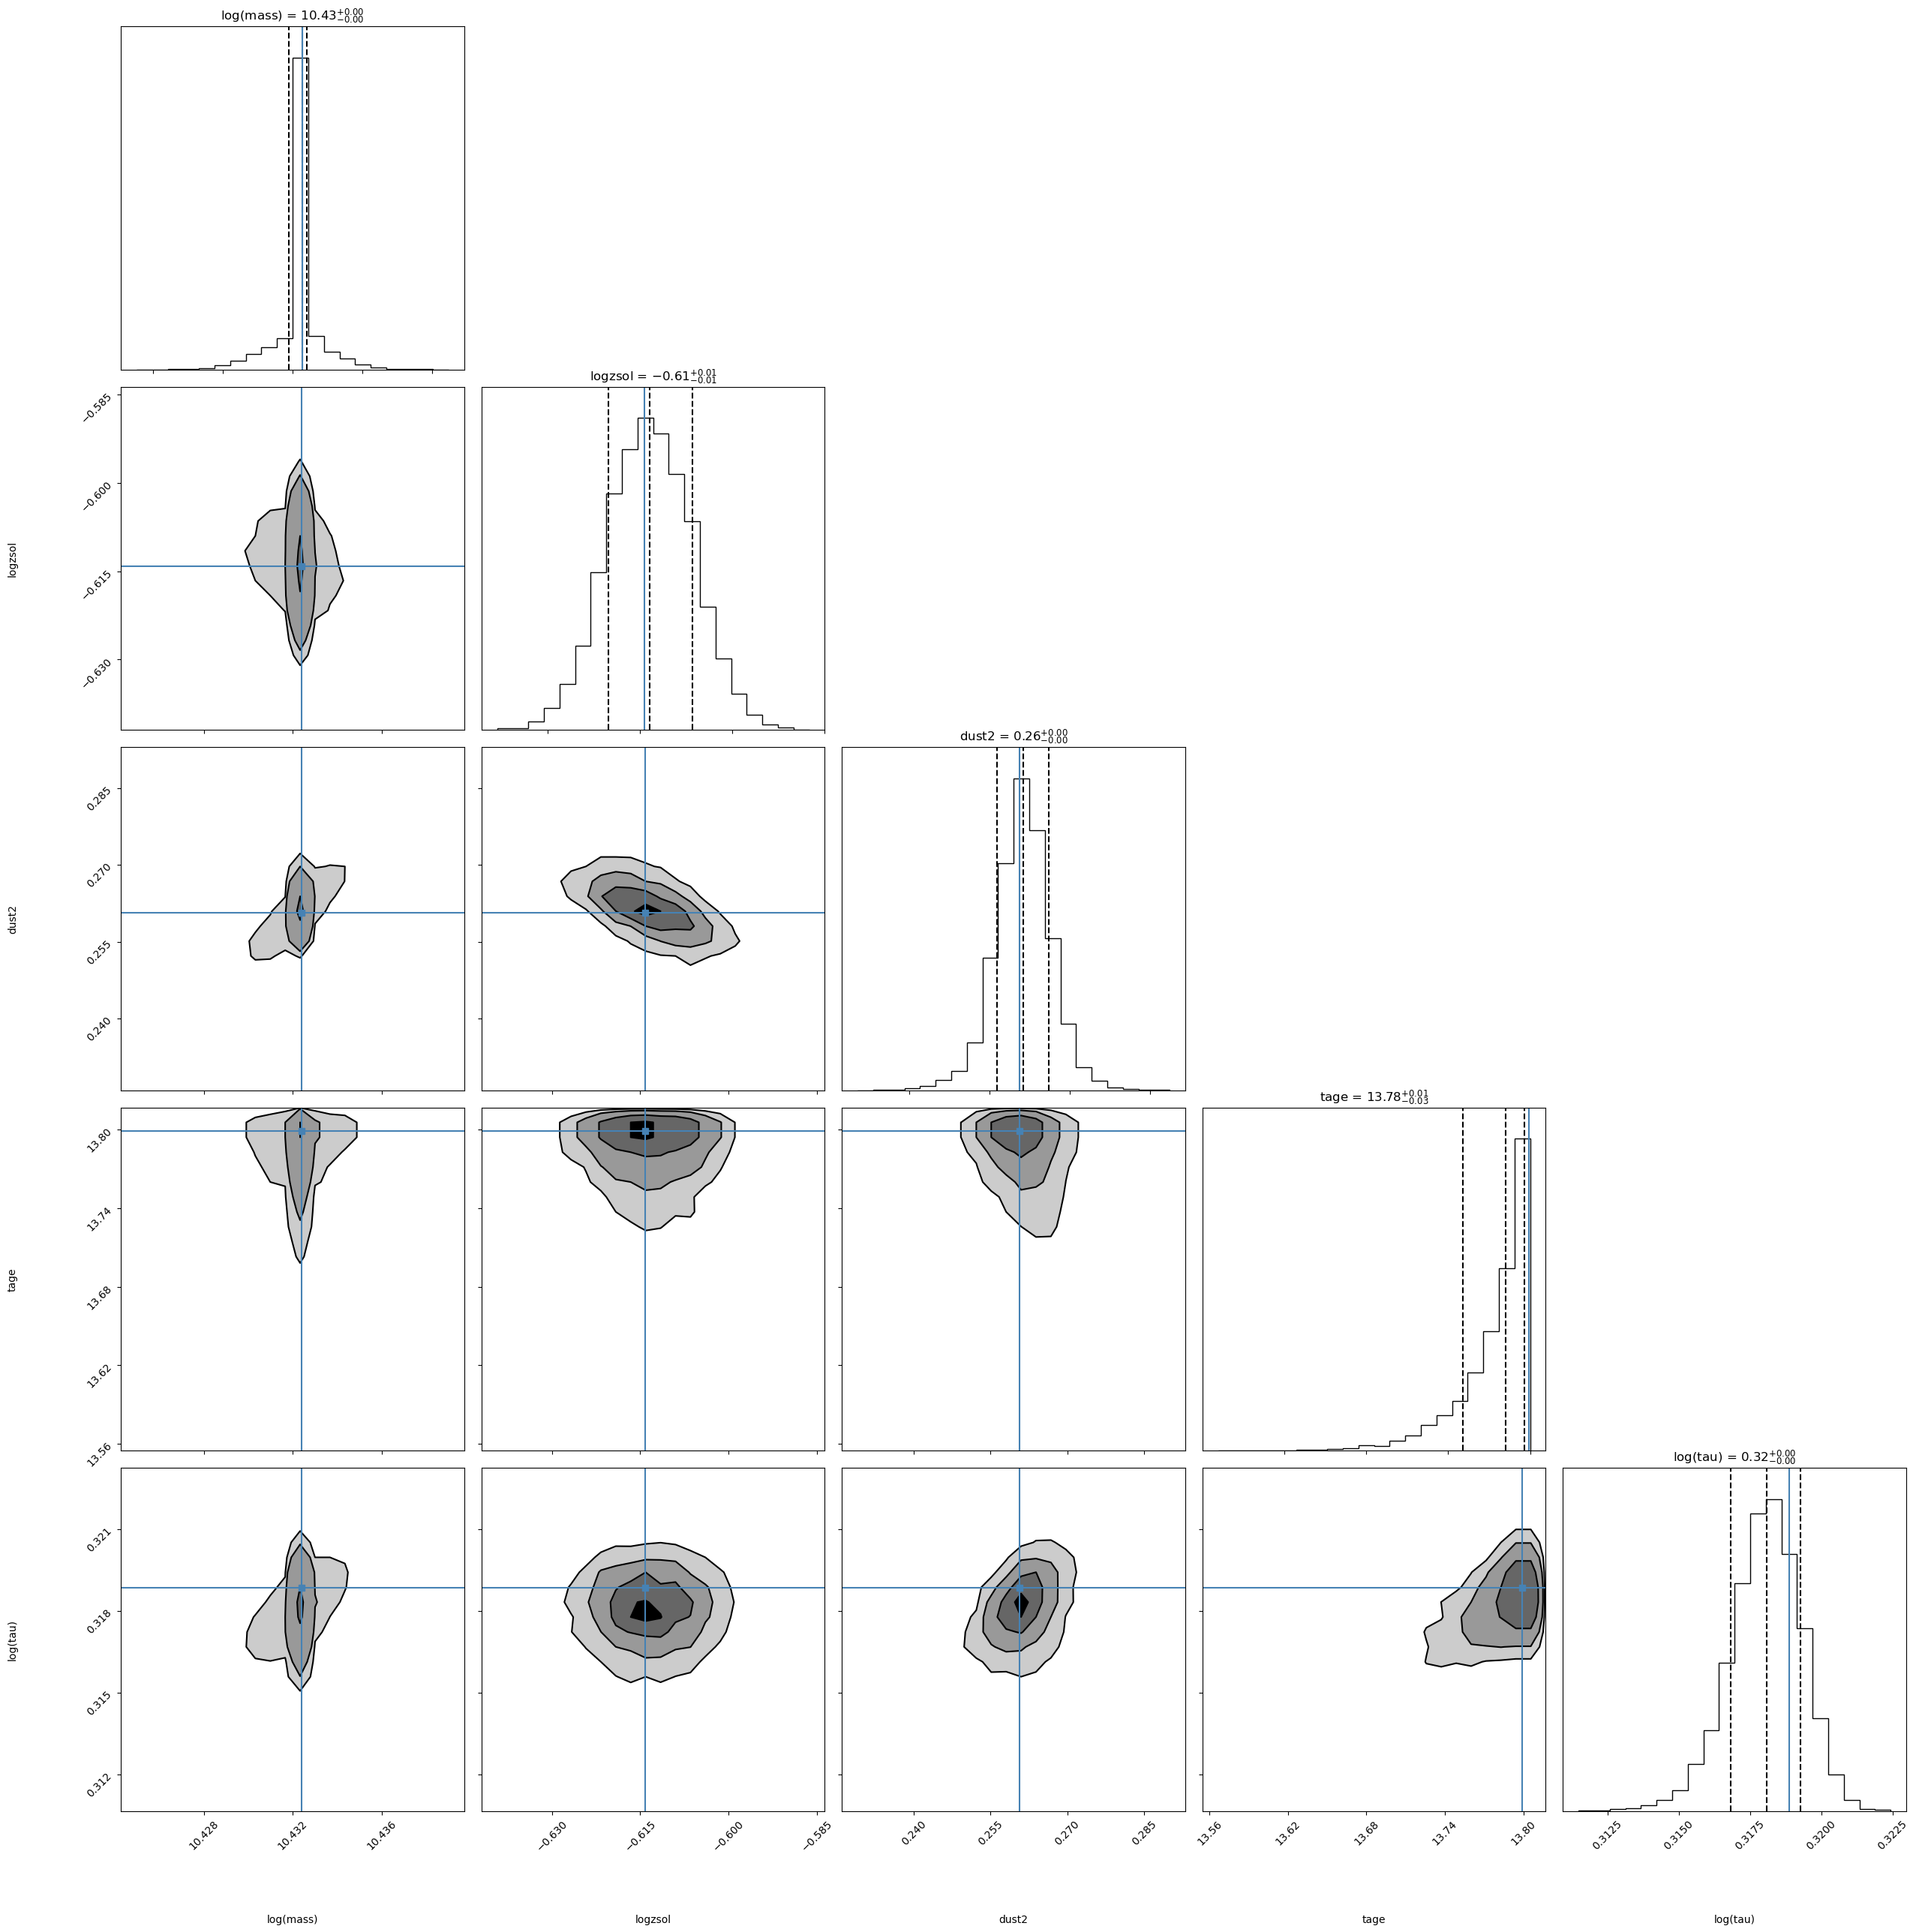

In [5]:
imax = np.argmax(result['lnprobability'])
if results_type == "emcee":
    i, j = np.unravel_index(imax, result['lnprobability'].shape)
    print(result['chain'][i, j, :].copy())
    theta_best = result['chain'][i, j, :].copy()
    thin = 5
else:
    theta_best = result["chain"][imax, :]
    thin = 1

print('Optimization value: {}'.format(theta_best))
print('MAP value: {}'.format(theta_best))
cornerfig = reader.subcorner(result, start=0, thin=thin, truths=theta_best, 
                             fig=plt.subplots(5,5,figsize=(27,27))[0])

In [6]:
imax = np.argmax(result['lnprobability'])
csz = result["chain"].shape
if result["chain"].ndim > 2:
    # emcee
    i, j = np.unravel_index(imax, result['lnprobability'].shape)
    theta_max = result['chain'][i, j, :].copy()
    flatchain = result["chain"].reshape(csz[0] * csz[1], csz[2])
else:
    # dynesty
    theta_max = result['chain'][imax, :].copy()
    flatchain = result["chain"]

# 16th, 50th, and 84th percentiles of the posterior
from prospect.plotting.corner import quantile
weights = result.get("weights", None)
post_pcts = quantile(flatchain.T, q=[0.16, 0.50, 0.84], weights=weights)

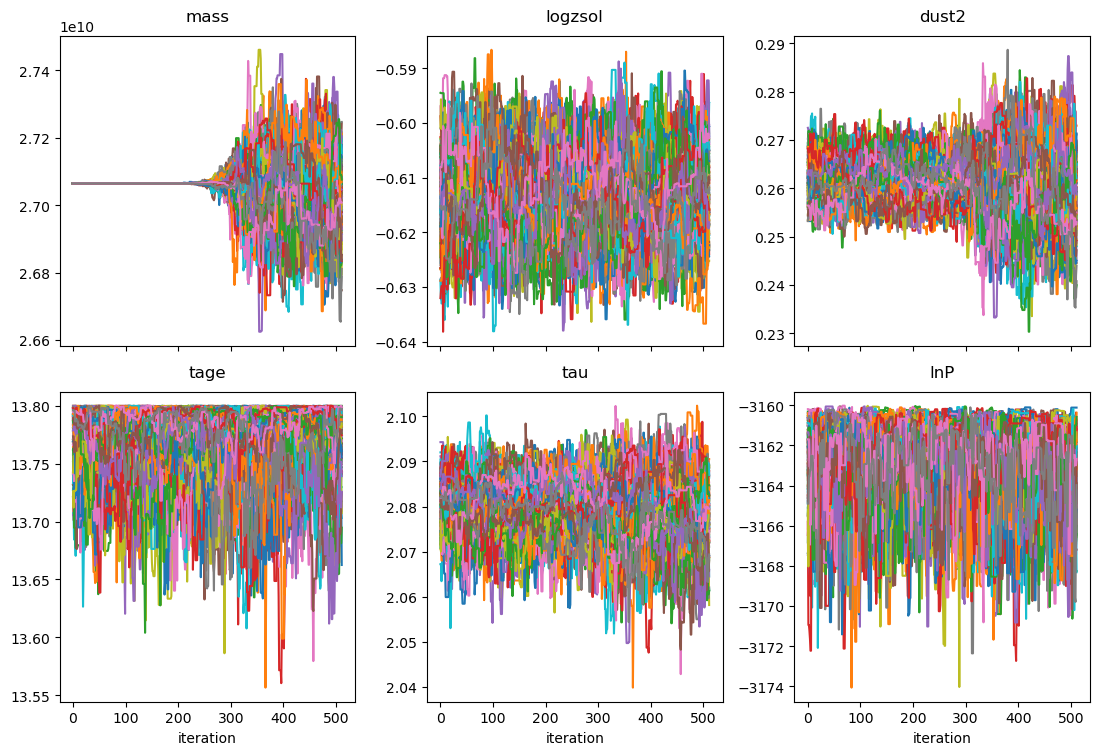

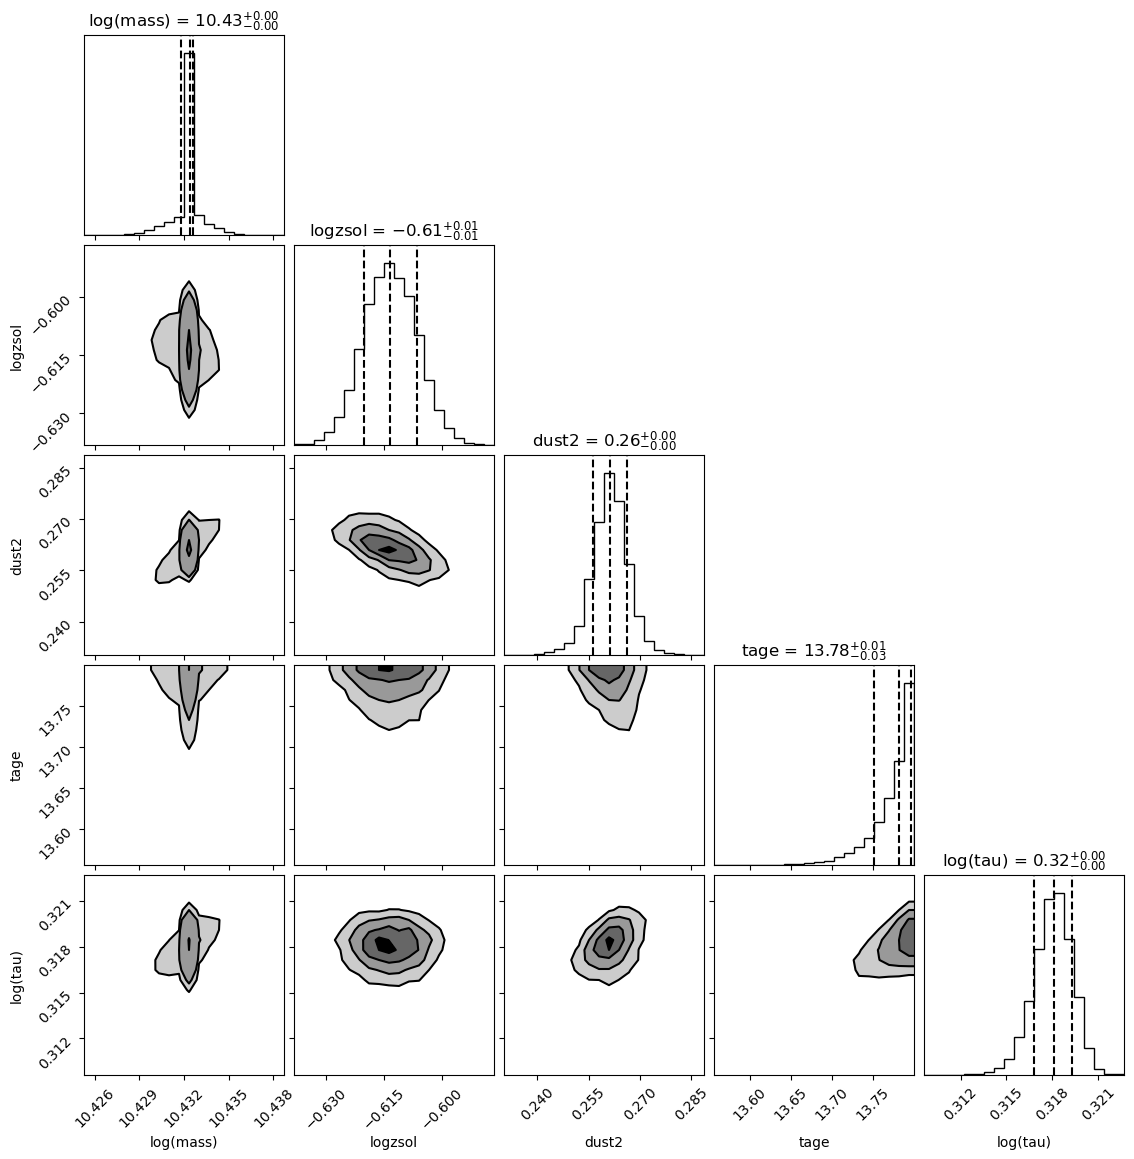

In [7]:
tfig = reader.traceplot(result)
# Corner figure of posterior PDFs
cfig = reader.subcorner(result)